## **<u>DSCI 100 Group 3 Project Report</u>**

## **Using KNN (classification) to model and analyze the degree at which various factors impact user knowledge**

By: Jaia Manhas, Jiarong Cui, Tejasvi Kathuria and Yitong Zhang

<img src=https://www.avepoint.com/blog/wp-content/uploads/2020/03/businessman-on-blurred-background-using-digital-artificial-icon-3d-picture-id1197563732.jpg width="1500">

Source: https://www.avepoint.com/blog/office-365/knowledge-management-office-365

## **<u>Introduction</u>**

### **Background information**

Our knowledge levels are increasing in volume, velocity and variety day to day as we learn more about the processes and technologies around us (Liao et al., 2021). User knowledge is a relevant field of research in data science that allows us to understand a user’s knowledge state and gain from interactions with a particular piece of technology or content relating to a specific subject. By understanding user knowledge and the factors that impact it, analysts can determine how to meet learning needs more effectively within the world of technology and education. Although various data modelling and visualization strategies can be used to approach user knowledge inquiries (Liao et al., 2021), we will be using the K-nearest neighbours algorithm, KNN (classification).

### **Our question**

Through modelling and analysis of factors that impact user knowledge, which factors can be used to most accurately predict knowledge levels of users through classification?

### **Dataset being used**

Our project uses the User Knowledge dataset (Kahraman et al., 2013), which provides information about students’ knowledge status (UNS) of Electrical DC Machines.

The 5 columns (attributes) recorded in the User Knowledge dataset can be divided into two groups:

1.	Study time degree (STG), repetition number degree (SCG) and exam performance (PEG) as related directly to course materials.
2.	Study time degree (STR) and exam performance (LPR) as related to beyond course (supplementary) materials.

The dataset (Kahraman et al., 2013) also provides information on class distribution.

The dataset can be accessed at: https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling.

## **<u>Methods And Results</u>**

After reading the data into R and ensuring it was in a tidy format (properly split into training and testing data), we explored the data by looking at the average and percentage distribution of each attribute and the mean of the total observation count. We proceeded to visualize the observation counts at each UNS level (comparing these counts to our total observation count mean). This exploration helped us understand the distribution and trends present in the User Knowledge dataset (Kahraman et al., 2013).

Next, we created scatterplots of attribute pairings to visualize their relationships and determine which attributes impact UNS the most. Using ggpairs to comparatively view the scatterplots, we then chose attributes PEG and LPR (both related to user exam performance) to later use in the building of our model. Although we initially thought that attributes related directly to course materials would be the most useful for prediction, we quickly realized that PEG and LPR are nicely correlated and would provide a solid foundation for our model.

Our next step was to create a model using KNN (classification). After creating a recipe that was standardized (centered and scaled), we visualized our accuracy estimate per number of neighbours. From here, we trained and fit our model with the correct K value for our analysis; the workflow we obtained identified our best K as 5. With K = 5, we used testing data (that was previously set aside) to verify our model and test our chosen attributes, PEG and LPR. In the verification process, we used our model to make test predictions, which were then evaluated by a confusion matrix that reported on the accuracy of our classifier.

Lastly, we visualized our end results by creating a table and figure to illustrate the confusion matrix obtained earlier. Our figure uses different colours and transparency to demonstrate proportional outcomes of true and false predictions. To clearly display our findings, we created a coloured scatterplot to visualize the accuracy of our model for chosen attributes, PEG and LPR.

## **<u>Preliminary Exploratory Data Analysis</u>**

### **Reading our dataset from the web into R**

In [49]:
# Import packages
library(tidyverse)
library(readxl)
library(repr)
library(tidymodels)                                    
library(GGally)
options(repr.matrix.max.rows = 6)

# Set the seed
set.seed(100)

**DISCUSSION ON READING OUR DATASET:** The first part of this code downloads our dataset and other files into R from the web. This enables us to access our data and use a variety of code functions that will be necessary later on in our data analysis. The second part (set the seed function) ensures that we get the same results for randomization, which makes our code reproducible. If we forgot to set the seed, the observations selected each time the code is run would give us different values (again, due to randomization).

### **Cleaning and wrangling our data into a tidy format**

**DISCUSSION ON TIDYING OUR DATA:** The User Knowledge dataset is already split into training and testing data; our first step is to simply extract the training data. We need to extract the training data specifically because we don't want our project to experience 'data leaking'. 'Data leaking' is a unideal phenomenon in which obtained results are too accurate (since testing data influenced how the model was built).

### **Summarizing the data**

In [50]:
url <- "https://github.com/YitongZhang01/DSCI100_Group_Project/blob/main/data/Training_data.xls?raw=true"
file <- download.file(url, 'data/training_data.xls')
train <- read_excel('data/training_data.xls') %>% mutate(UNS = as_factor(UNS))

train

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


**Table 1:** Training data loaded into R from GitHub. Since we will be working with UNS as a categorical statistical variable, we convert it to a factor using the function as_factor.

In [51]:
# Calculate averages for each attribute
train_avg <- summarize(train, 
             across(STG:PEG,mean))
train_avg

STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


**Table 2:** Average values of our 5 attributes of UNS.

In [52]:
# Explore the data
num_obs <- nrow(train)

train_exp <- train %>%
             group_by(UNS) %>%
             summarize(
             count = n(),
             percentage = n() / num_obs * 100,
             mean = num_obs/4) %>%
             arrange(by = desc(percentage))
train_exp

`summarise()` ungrouping output (override with `.groups` argument)



UNS,count,percentage,mean
<fct>,<int>,<dbl>,<dbl>
Middle,88,34.108527,64.5
Low,83,32.170543,64.5
High,63,24.418605,64.5
very_low,24,9.302326,64.5


**Table 3:** Percentage distribution from high to low for each attribute of UNS. 64.5 is the output value for the mean of our total observation counts.

**DISCUSSION ON SUMMARIZING OUR DATA:** To summarize our data, we calculated the average and percentage distribution of each attribute and the mean of the total observation counts. This information allows us to better understand what our data actually might look like. Looking especially at the percentage distributions, we might want to consider the impact of uneven UNS level counts on our findings (very_low will not have an equal vote compared the three other levels). Our mean of the total observation counts, 64.5, is particularly useful in urging us to consider upsampling in further research.

### **Visualizing the data**

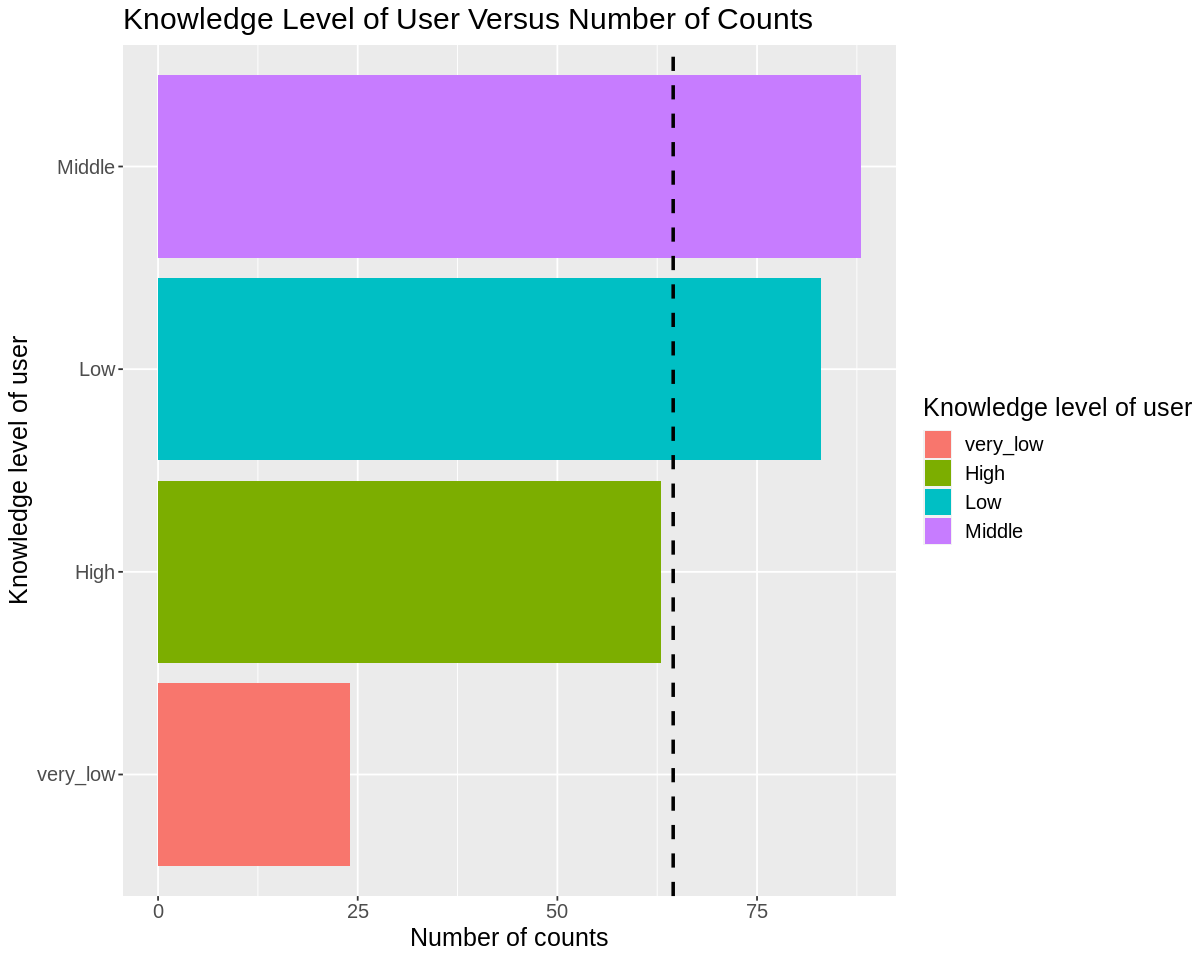

In [56]:
# Visualize the observation counts at each knowledge level of user and indicate the mean of 64.5
options(repr.plot.width = 10, repr.plot.height = 8)

UNS_bar <- ggplot(train_exp, aes(x = count, y = UNS, fill = UNS)) +
           geom_bar(stat = "identity") +
           labs(x = "Number of counts", y = "Knowledge level of user", fill = "Knowledge level of user") +
           geom_vline(xintercept = 64.5, linetype = "dashed", size = 1) +
           ggtitle("Knowledge Level of User Versus Number of Counts") +
           theme(text = element_text(size = 15))
UNS_bar

**Figure 1:** Bar graph displaying observation counts at UNS level. The total observation count mean, 64.5, is represented by a dashed line.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



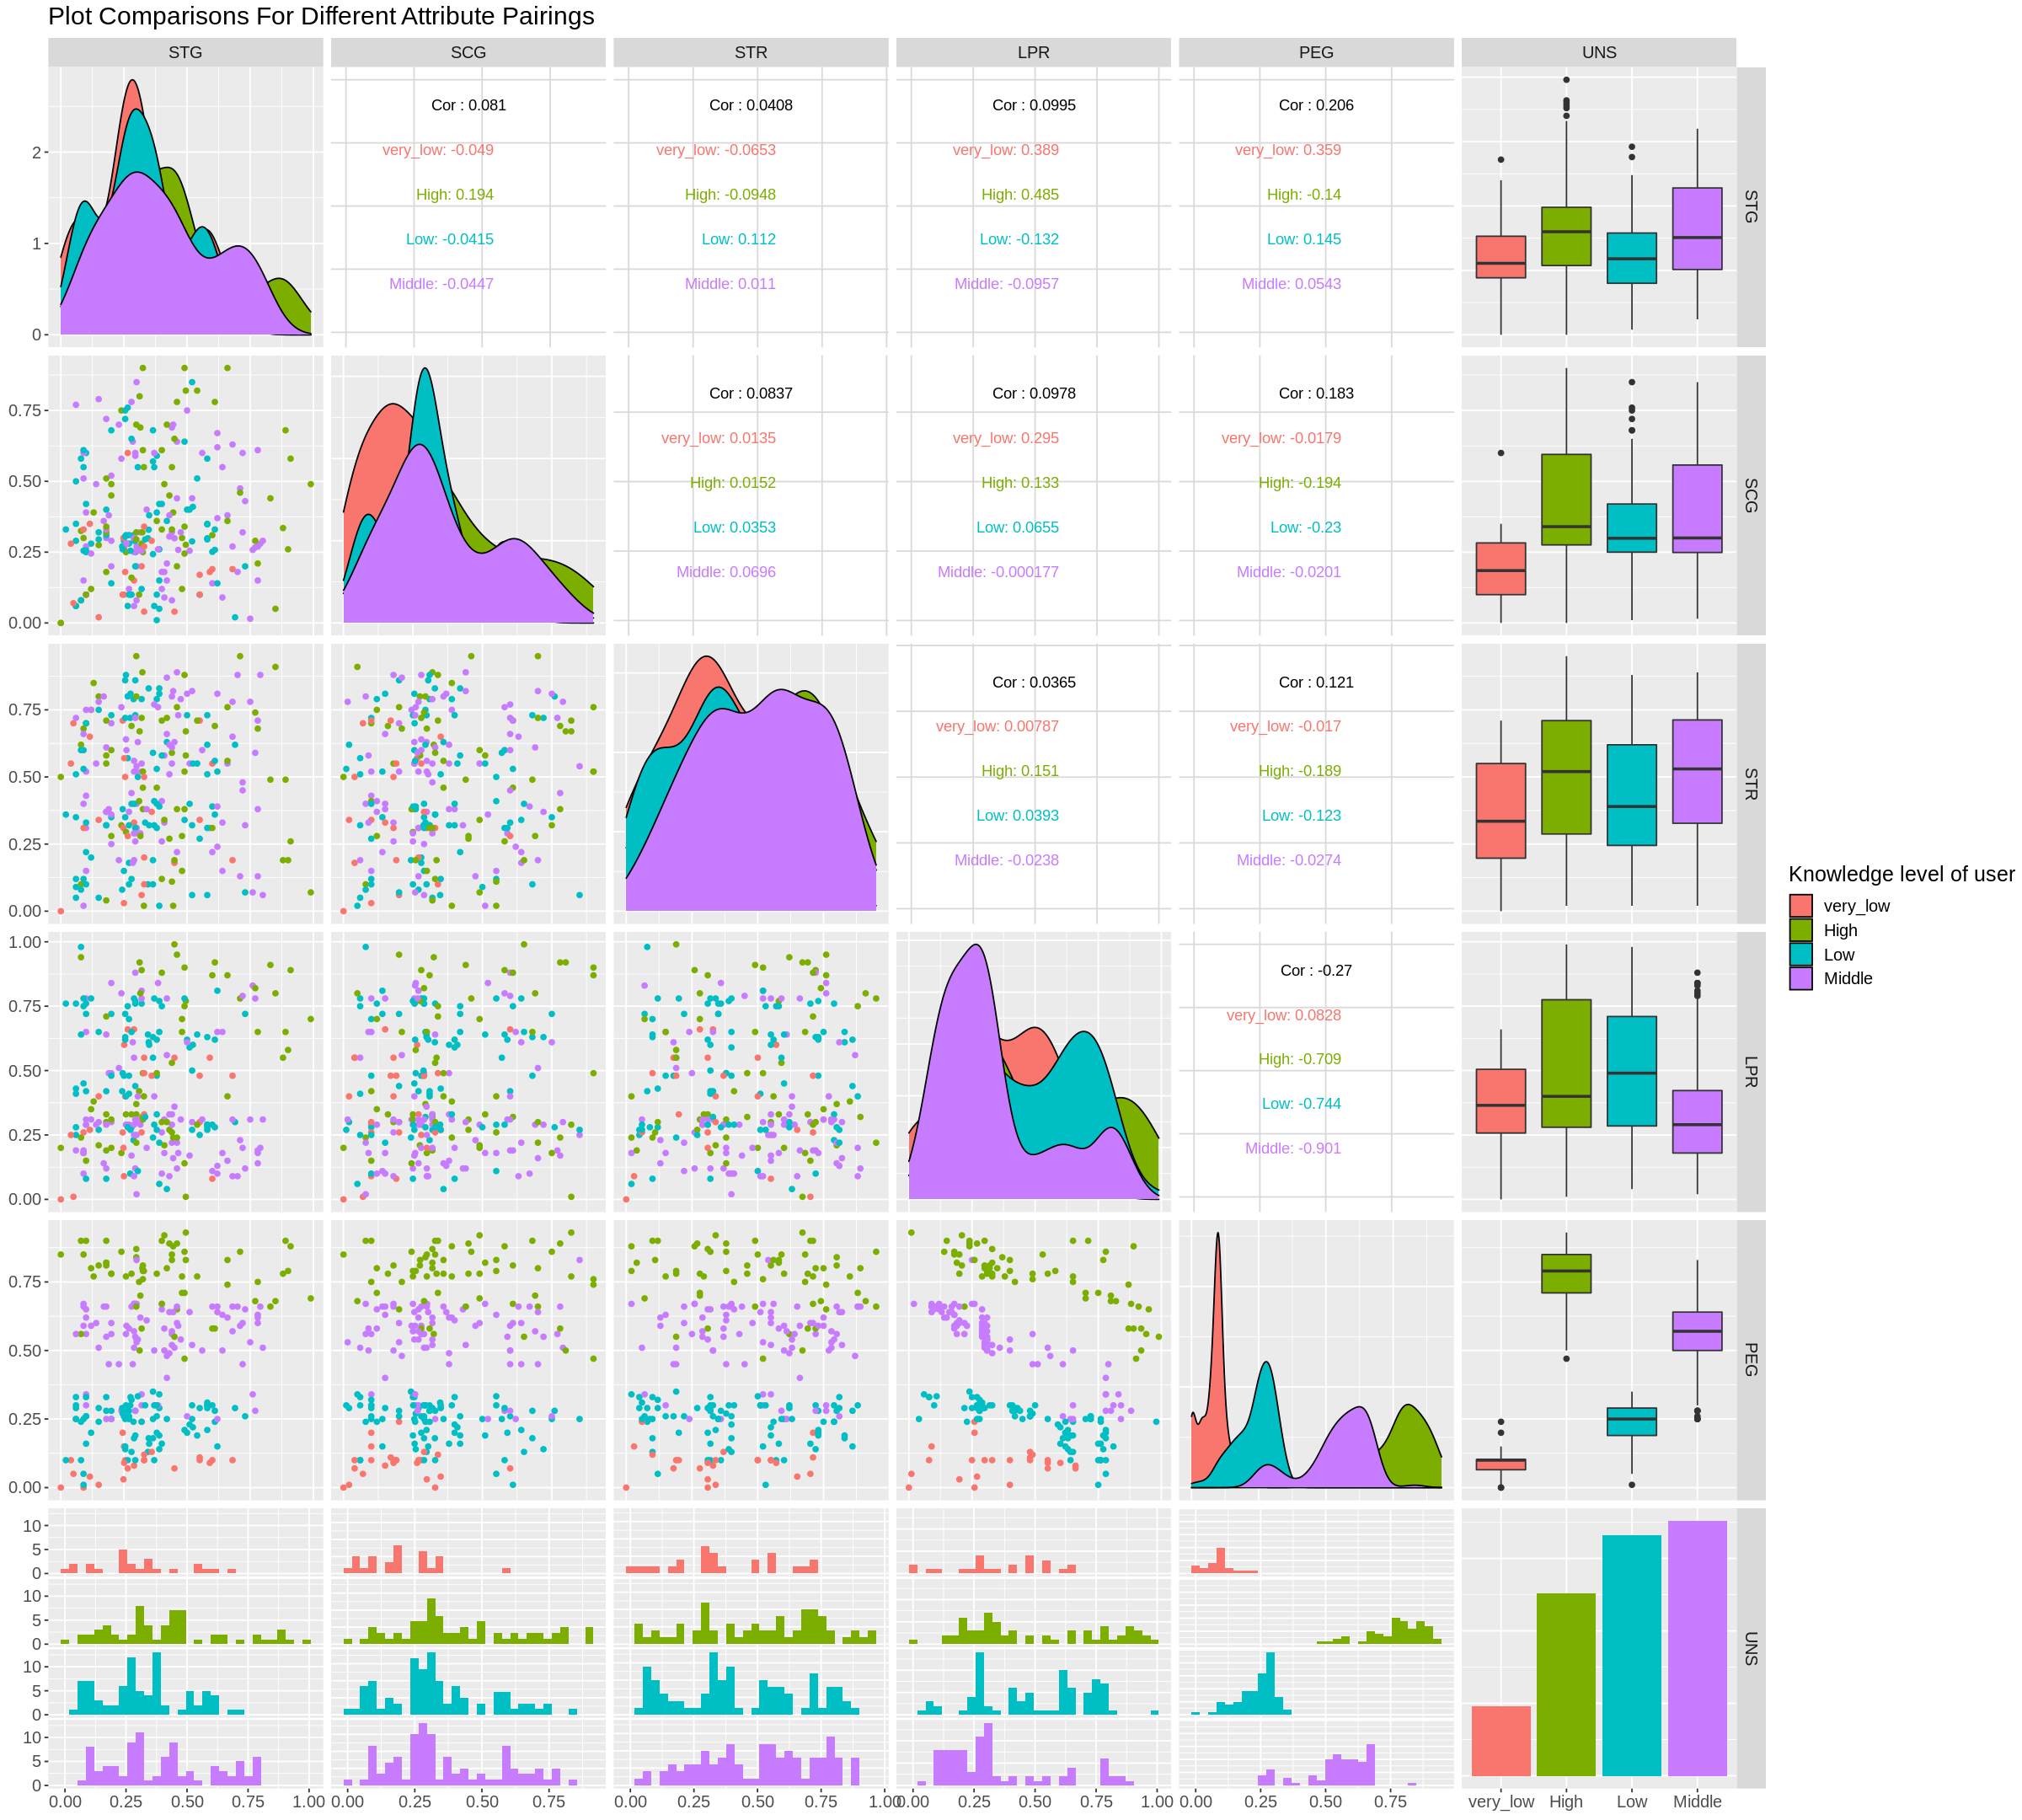

In [57]:
# Use ggpairs to comparatively view plots displaying attribute pairings
options(repr.plot.width = 20, repr.plot.height = 18)

train_eda <- train %>%  
             ggpairs(column = 1:6, mapping = ggplot2::aes(color = UNS), legend = 1, aes(color = factor(vs, levels = c(0,1), labels = c("very_low","Low", "Middle","High")))) +
             theme(text = element_text(size = 15), legend.position = "right") +
             labs(fill = "Knowledge level of user") +
             ggtitle("Plot Comparisons For Different Attribute Pairings")
train_eda



**Figure 2:** A comparative view of plots that display different attribute pairings. We use different colours to display the 4 UNS levels and easily compare them.

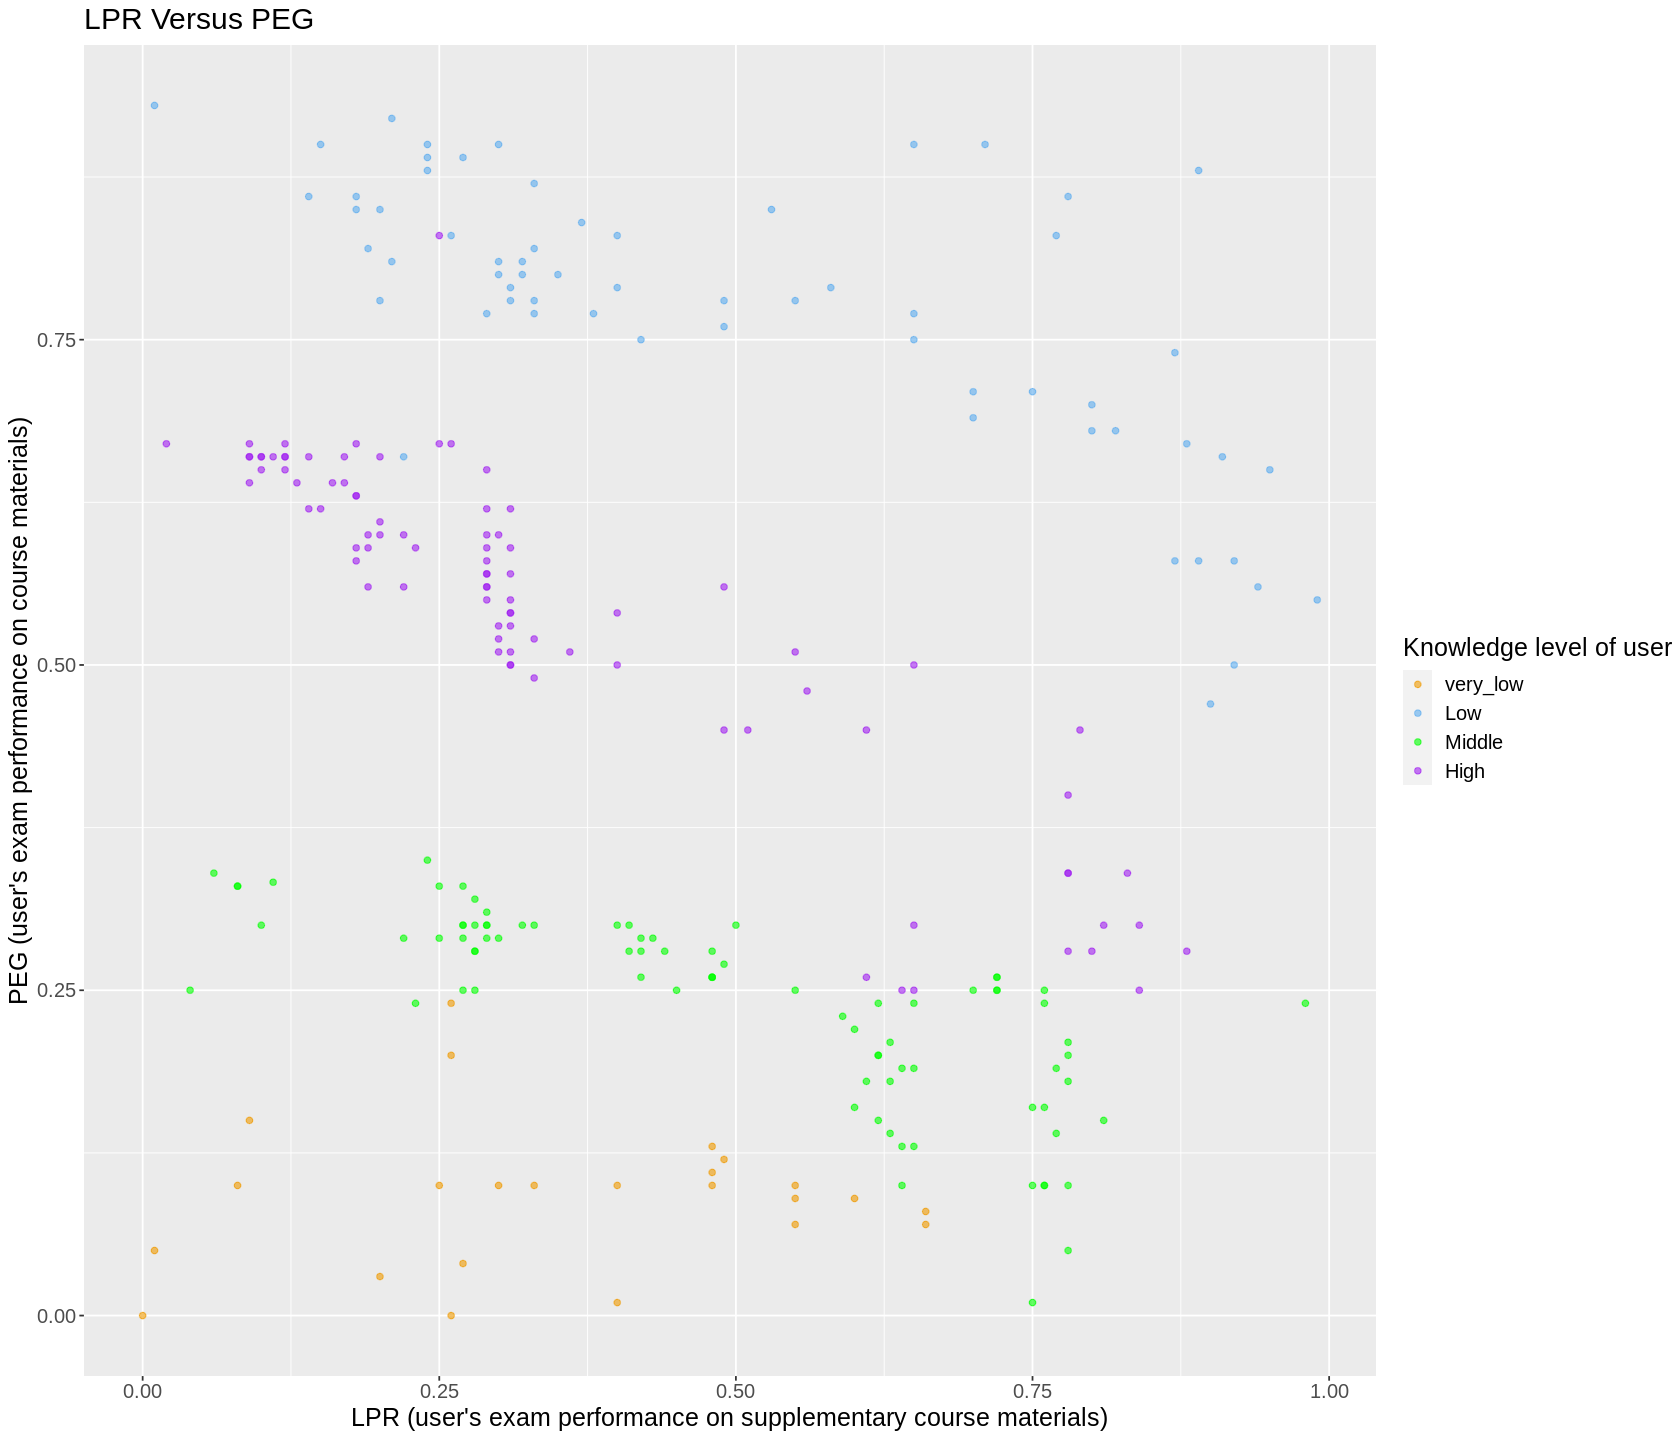

In [58]:
# Scatterplot of attributes PEG and LPR
options(repr.plot.width = 14, repr.plot.height = 12)

perim_concav_2 <- train %>%
                  ggplot(aes(x = LPR, y = PEG, color = UNS)) +
                  geom_point(alpha = 0.6) +
                  labs(x = "LPR (user's exam performance on supplementary course materials)", 
                       y = "PEG (user's exam performance on course materials)",
                       color = "Knowledge level of user") +
                  scale_color_manual(labels = c("very_low","Low", "Middle","High"), 
                       values = c("orange2", "steelblue2","green","purple")) +
                  theme(text = element_text(size = 15)) +
                  ggtitle("LPR Versus PEG")
perim_concav_2

**Figure 3:** Scatterplot of the relationship between PEG and LPR; the relationship is clear and we see that the data points are in cluster formation. This scatterplot was extracted from our ggpairs plot so that we would be able to better visualize the spread of data points.

**DISCUSSION ON VISUALIZING OUR DATA:** From our visualizations, we can determine that the attributes PEG and LPR most accurately predict knowledge levels of users. Compared to the other attribute pairings, they display a correlation that will allow for straightforward predictions once our model is built. Although we initially thought that different attributes would be used to construct our model, we have since realized that because exam performance is the last chronological step in an exam process, choosing to continue with PEG and LPR is logically feasible.

## **<u>Data Analysis</u>**

### **Performing our analysis**

In [59]:
set.seed(98)

# Create the recipe and standardize it so all attributes have a mean of 0 and a standard deviation of 1
data_recipe <- recipe(UNS ~ LPR + PEG , data = train) %>%
               step_scale(all_predictors()) %>%
               step_center(all_predictors())

# Define the model
ks <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

data_vfold <- vfold_cv(train, v = 5, strata = UNS)

results <- workflow() %>%
           add_recipe(data_recipe) %>%
           add_model(knn_spec) %>%
           tune_grid(resamples = data_vfold, grid = ks) %>%
           collect_metrics()

accuracies <- results %>%
              filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9576055,5,0.009080228,Model01
2,accuracy,multiclass,0.9576055,5,0.009080228,Model02
3,accuracy,multiclass,0.9573850,5,0.003780194,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,multiclass,0.9496898,5,0.007686654,Model08
9,accuracy,multiclass,0.9457682,5,0.003776592,Model09
10,accuracy,multiclass,0.9457682,5,0.003776592,Model10


**Table 4:** Our defined model. It was made by creating a recipe and standardizing it so all variables in the data set have a mean of 0 and a standard deviation of 1. It is important to note that we set our seed before creating the recipe, so that our results are reproducible.

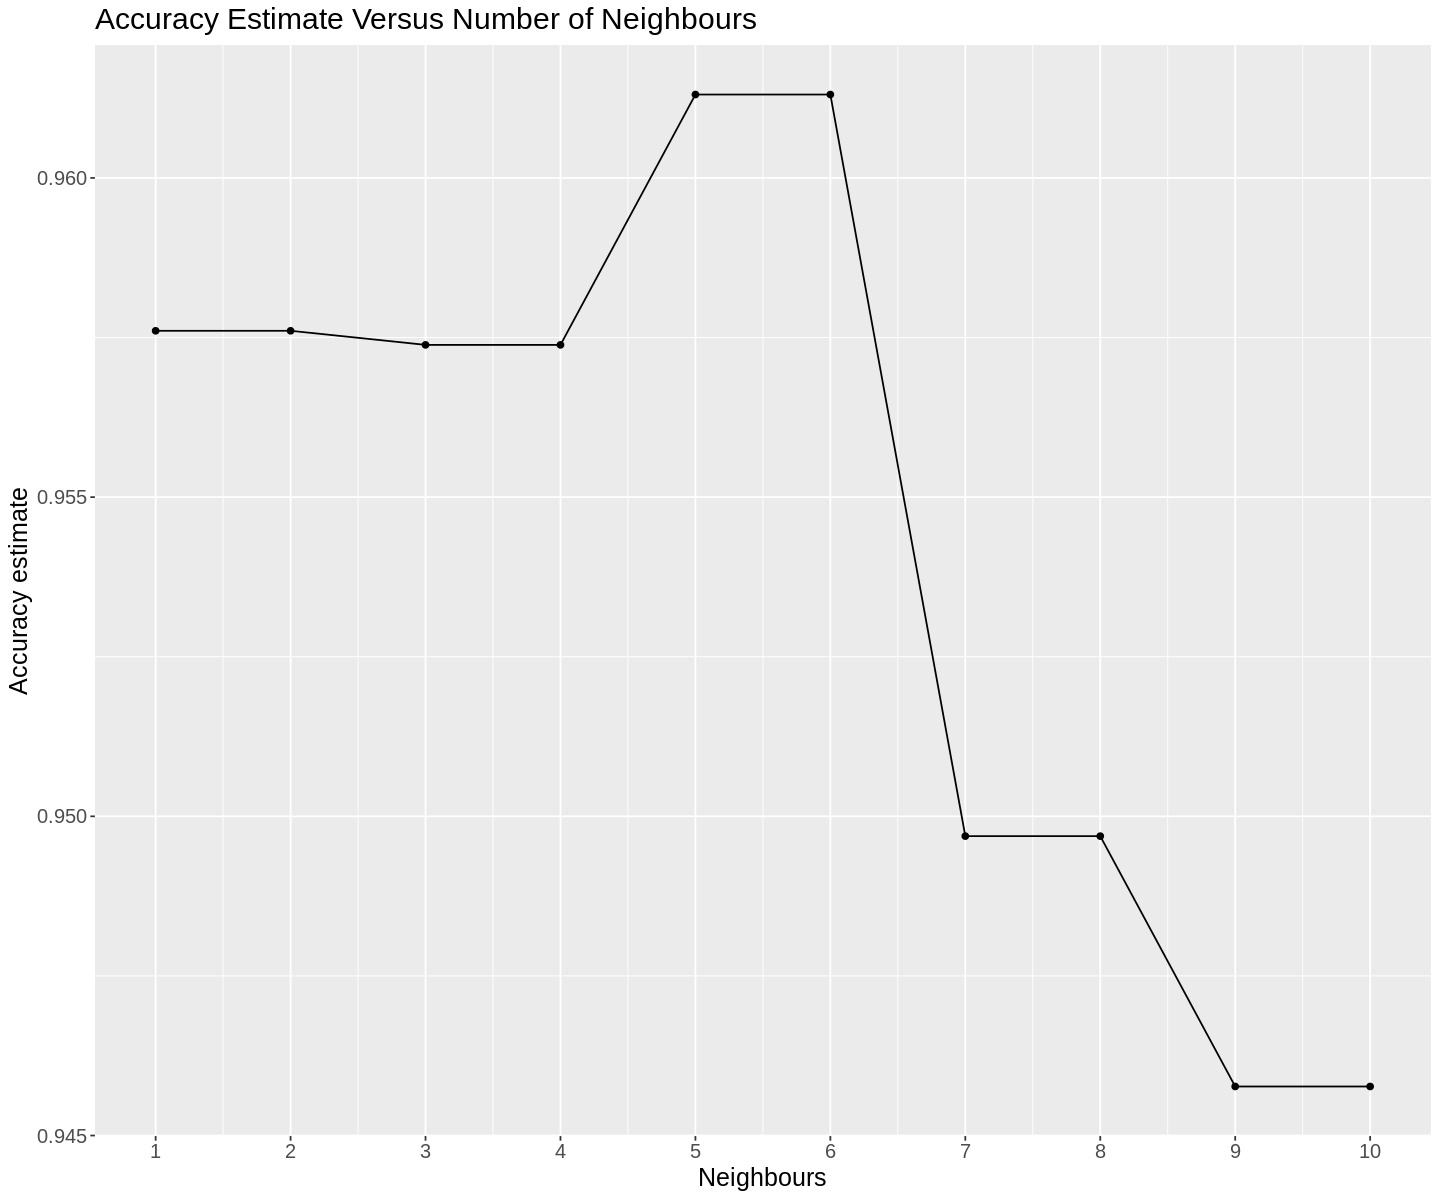

In [60]:
# Visualize the accuracy
options(repr.plot.width = 12, repr.plot.height = 10)

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                 geom_point() +
                 geom_line() +
                 labs(x = "Neighbours", y = "Accuracy estimate") +
                 theme(text = element_text(size = 15)) + 
                 scale_x_continuous(breaks = 1:10) +
                 ggtitle("Accuracy Estimate Versus Number of Neighbours")
accuracy_vs_k

**Figure 4:** A visualization of our model’s accuracy estimate per number of neighbours. We can observe that the neighbour values from 5 to 6 obtain the highest accuracy estimates (these data points are the highest on the graph).

In [61]:
# Train the model with the correct K value and fit the model
knn_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
                 set_engine("kknn") %>%
                 set_mode("classification")

model_fit<- workflow() %>%
            add_recipe(data_recipe) %>%
            add_model(knn_spec_best) %>%
            fit(data = train)
model_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~5, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.04263566
Best kernel: rectangular
Best k: 5

**Figure 5:** A workflow made from training our model with the correct K value and fitting it. Our best K is reported as 5.

In [62]:
url_1 <- "https://github.com/YitongZhang01/DSCI100_Group_Project/blob/main/data/test_data.xlsx?raw=true"
file_1 <- download.file(url_1, 'data/testing_data.xlsx')
test <- read_excel('data/testing_data.xlsx') %>% mutate(UNS = as_factor(UNS))

test

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,very_low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


**Table 5:** Testing data loaded into R from GitHub. Since we will be working with UNS as a categorical statistical variable when using our testing data as well, we convert it to a factor using the function as_factor.

In [63]:
test_predictions <- predict(model_fit, test) %>%
                    bind_cols(test)
test_predictions

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
very_low,0.00,0.10,0.50,0.26,0.05,very_low
Low,0.05,0.05,0.55,0.60,0.14,Low
High,0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Low,0.56,0.60,0.77,0.13,0.32,Low
Middle,0.66,0.68,0.81,0.57,0.57,Middle
Middle,0.68,0.64,0.79,0.97,0.24,Middle


**Table 6:** A predictions table of the UNS levels for our testing data. The bind_cols function is used to display the .pred_class column in the table, as it can be used to compare with the true UNS values.

In [64]:
# Make test predictions
test_predictions %>% 
mutate(.pred_class = factor(.pred_class, levels = c("very_low", "Low", "High", "Middle"))) %>%
metrics(truth = UNS, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9724138
kap,multiclass,0.9626192


**Table 7:** A summary of the classifiers’ accuracy.

In [65]:
# Use confusion matrix to verify classifiers' accuracy.
model_mat <- test_predictions %>% 
             mutate(.pred_class = factor(.pred_class, levels = c("very_low", "Low", "High", "Middle"))) %>% 
             conf_mat(truth = UNS, estimate = .pred_class)  
model_mat

          Truth
Prediction very_low Low High Middle
  very_low       24   0    0      0
  Low             2  45    0      1
  High            0   0   39      0
  Middle          0   1    0     33

**Table 8:** A confusion matrix to verify the accuracy of the classifier.

**DISCUSSION ON PERFORMING OUR ANALYSIS:** Our best K is 5 and this is confirmed by our workflow; this means we will use K = 5 to train our classifier. By using this K value in our test predictions, we are able to obtain a classification accuracy of 97%.

### **Visualizing our analysis**

In [66]:
# Visualize the confusion matrix
table <- data.frame( model_mat$table)

plotTable <- table %>%
             mutate(has_result = ifelse(table$Freq == "0","no","yes")) %>%
             mutate(goodbad = ifelse(Prediction == Truth, "true_prediction", ifelse(has_result == "no", "no_prediction", "false_prediction")))%>%
             group_by(Truth) %>%
             mutate(prop = Freq/sum(Freq))
plotTable

Prediction,Truth,Freq,has_result,goodbad,prop
<fct>,<fct>,<int>,<chr>,<chr>,<dbl>
very_low,very_low,24,yes,true_prediction,0.92307692
Low,very_low,2,yes,false_prediction,0.07692308
High,very_low,0,no,no_prediction,0.00000000
⋮,⋮,⋮,⋮,⋮,⋮
Low,Middle,1,yes,false_prediction,0.02941176
High,Middle,0,no,no_prediction,0.00000000
Middle,Middle,33,yes,true_prediction,0.97058824


**Table 9:** Visualizing the confusion matrix.

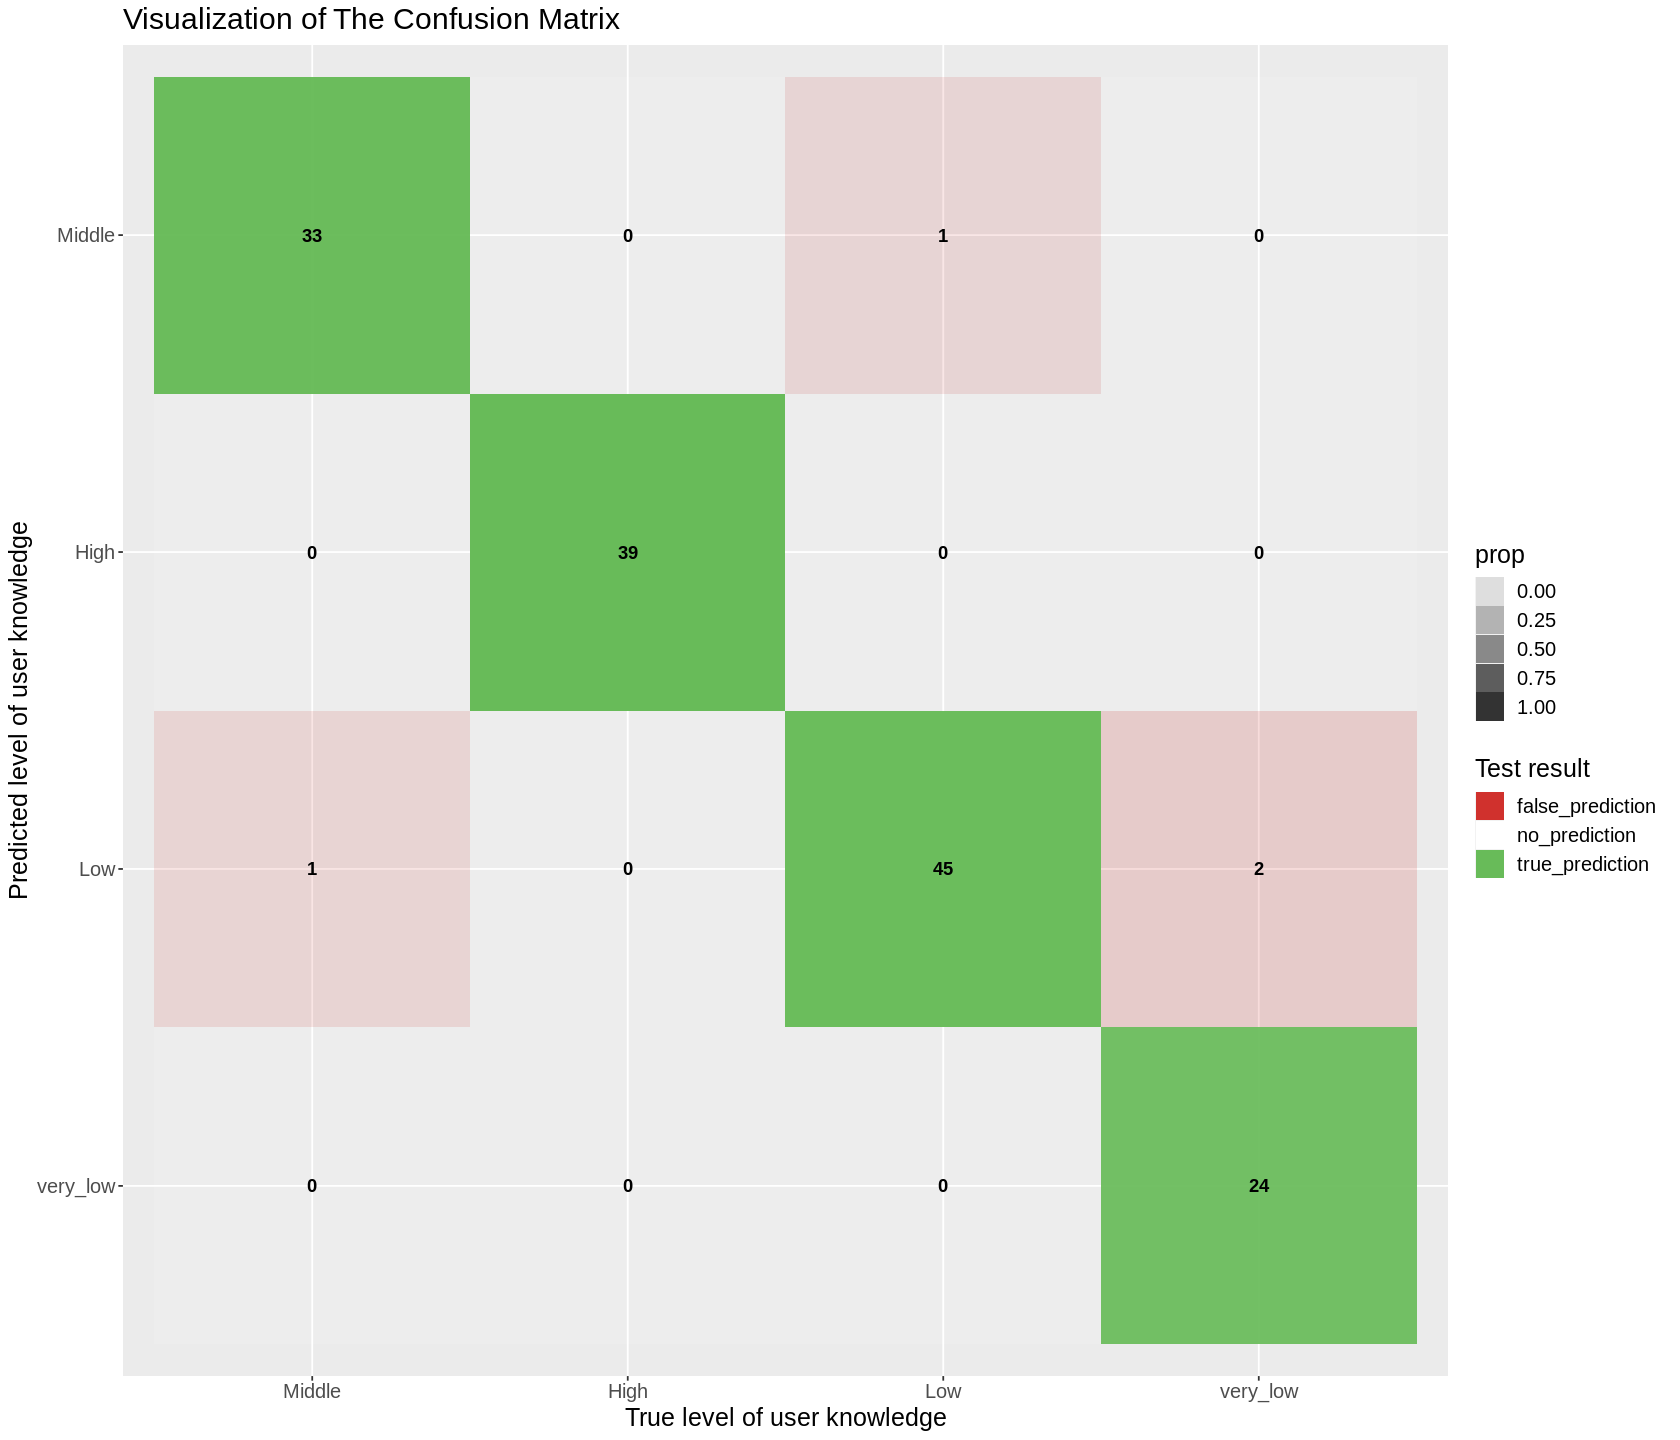

In [68]:
# Fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
options(repr.plot.width = 14, repr.plot.height = 12)

confusion_matrix_vis <- ggplot(data = plotTable, mapping = aes(x = Truth, y = Prediction, fill = goodbad, alpha = prop)) +
                        geom_tile() +
                        geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1) +
                        scale_fill_manual(values = c(true_prediction = "#68BB59", false_prediction = "#D0312D", no_prediction = "#FFFFFF")) +
                        labs(x = "True level of user knowledge", y = "Predicted level of user knowledge", fill = "Test result") +
                        ggtitle("Visualization of The Confusion Matrix") +
                        xlim(rev(levels(table$Truth))) +
                        theme(text = element_text(size = 15))
confusion_matrix_vis

**Figure 6:** A visualization of the confusion matrix. As outlined in our legend, green squares indicate true predictions and red squares indicate false predictions based on our testing data. In addition, the transparency of the green and red squares shows the proportion of observations that were predicted in each case (the green squares are more solid than the red squares because more observations were found to be true predictions versus false predictions).

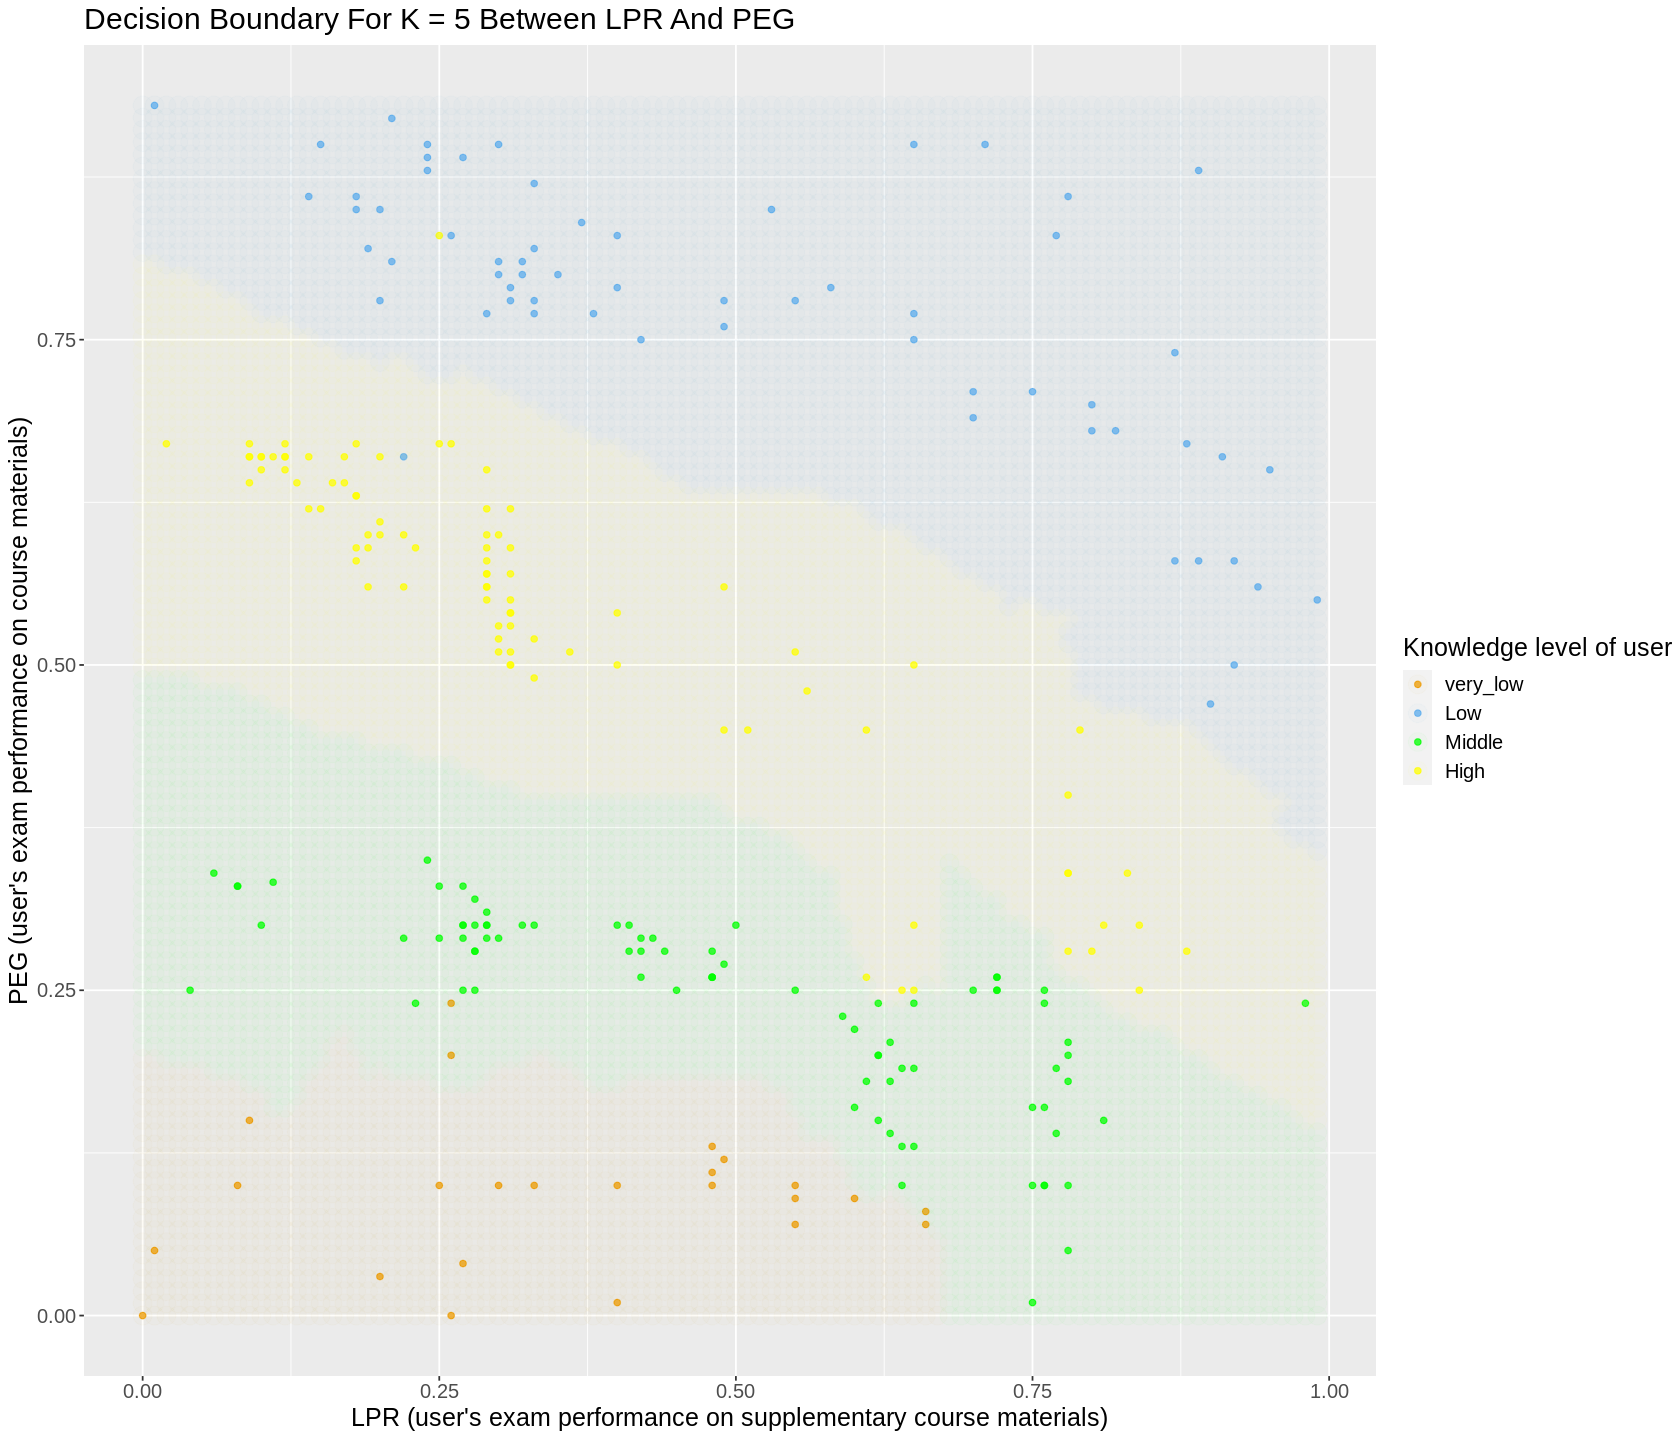

In [69]:
# Create a plot of decision boundaries for visualization

# Create the grid of area/smoothness values and arrange them in a data frame
are_grid <- seq(min(train$LPR), 
                max(train$LPR), 
                length.out = 100)

smo_grid <- seq(min(train$PEG), 
                max(train$PEG), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(LPR = are_grid, 
                                PEG = smo_grid))

# Use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(model_fit, asgrid)

# Bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>%
                    rename(UNS = .pred_class)

# Plot:
# 1. The coloured scatter of the original data
# 2. The faded coloured scatter for the grid points

wkflw_plot <- ggplot() +
              geom_point(data = train, 
              mapping = aes(x = LPR, 
                            y = PEG, 
                            color = UNS), 
              alpha = 0.75) +
              geom_point(data = prediction_table, 
              mapping = aes(x = LPR, 
                            y = PEG, 
                            color = UNS), 
              alpha = 0.02, 
              size = 5) +
              labs(x = "LPR (user's exam performance on supplementary course materials)", 
                   y = "PEG (user's exam performance on course materials)",
                   color = "Knowledge level of user") +
              scale_color_manual(labels = c("very_low","Low", "Middle","High"), 
                   values = c("orange2", "steelblue2","green","yellow")) +
              ggtitle("Decision Boundary For K = 5 Between LPR And PEG") +
              theme(text = element_text(size = 15))
wkflw_plot

**Figure 7:** A visualization of our model's decision boundaries to see the accuracy of our model for attributes PEG and LPR.

**DISCUSSION ON VISUALIZING OUR ANALYSIS:** In visualizing our confusion matrix, it is revealed that 24, 45, 39 and 33 observations were correctly predicted as very_low, Low, High and Middle respectively. Therefore, our classifier was able to label 141 observations (24 + 45 + 39 + 33) correctly. However, we can see that the classifier made a few mistakes; specifically, it falsely classified two observations as low when they were truly very_low and one observation as low when it was truly Middle. From the visualization of our confusion matrix, we can see that a significant number of true predictions were made versus false ones (the green squares have much higher counts and appear to be solid compared to the transparent red squares). Our final scatterplot demonstrates that our model is making justified predictions, as the colour hued areas are uniform and appropriate based on where the data points fall.

## **<u>Discussion</u>**

### **Evaluating our findings**

After considering our findings, we think our slight prediction error might be due to the fact that data obtained from our training data is not balanced. For this reason, we think that we may be able to improve our accuracy in further research by re-balancing the data by oversampling the rare class. As we can see from Table 3, the very_low knowledge level of user only has a count of 24 observations (compared to our total observation mean of 64.5, which means we could use upsampling to give more voting power to very_low in our KNN algorithm.

At the end of the day, the logical flow of our proposed methods helped us understand and process our data efficiently. It is critical to note that the best K value provided by our model recipe’s workflow was influential in maximizing the accuracy of our model. While our classes could have been manipulated to be more well-balanced, our classification was quite thorough with little inaccuracy and as such, ultimately helped us answer our predictive question (that we formulated when starting this project).

### **Our findings versus expected outcomes**

Our findings are aligned nicely with our expected outcomes for this project. After our preliminary exploratory data analysis, we predicted that PEG and LPR would be the most useful attributes in classification of the User Knowledge dataset (Kahraman et al., 2013) due to their clear relationship indicated by a strong correlation. 

After performing our data analysis and following through with our classification, it is evident that PEG and LPR were able to most accurately predict knowledge levels of users. To this extent, we were not surprised by any of our findings. If anything, it was at first thought-provoking that our classification accuracy was so high (>95%). While we might have been suspicious of this result for another dataset, the User Knowledge dataset (Kahraman et al., 2013) presents its data points in distinct cluster formations that allow for straightforward predictions, as there are again, distinct trends to be used as guidelines.

### **Impact of our findings**

In the modern day, students face many academic pressures related to achieving high grades. While we cannot evaluate principles of study for efficient learning with negligence of other factors such as subject studied, home or college circumstances, ability, personality and health (Cooper & Foy, 1969), our project highlights the attributes that have the highest potential for increasing user knowledge, PEG and LPR, out of the 5 attributes provided by the User Knowledge dataset (Kahraman et al., 2013). Since PEG and LPR are both related to user exam performance, our findings place importance on maximizing user exam grades. 

By understanding trends that indicate a significant correlation between high exam grades and high user knowledge, educators can adapt their teaching strategies to meet learning needs more effectively and subsequently increase the number of students that are able to perform well academically. This will involve strengthening user study strategies.

It is important to note that pre-existing literature does not fill the knowledge gap on supplemental instruction and tutoring in which selection bias is reduced from the bifold in which whether participation occurred or not to the extent of participation in programs (Carr & London, 2019). It is critical that this knowledge gap is saturated by new research because the resulting experimental data will allow analysts to identify how exactly attributes of exam performance, particularly study strategies, correlate to exam performance, if at all. 

Another imperative discussion point regarding user knowledge is that when conclusions are made, it must be understood that attributes of any larger category are not mutually exclusive when applied to real life circumstances. The user knowledge field of research demands that all factors applicable or relevant to each individual person (or observation, in data science language) are accounted for in such inquiries.

### **Future questions for further research**

Our findings will act as the foundation for further research into how user knowledge can be increased by maximizing user exam grades. This further research will hopefully give students insight on tangible actions they can take to positively contribute to their academic achievements of high grades.

The outcomes derived from our findings pose the following questions:

1.	How is exam performance exactly impacted by its own attributes?
2.	If it is found to be true that strengthened study strategies can impact exam performance, is it appropriate to expect user exam grades to improve at a specific rate?
3.	Can class distribution help us consider outliers (eg. a student that studies well and receives a bad grade or one that doesn’t study well and receives a good grade) in further modelling and research of user knowledge inquiries?

## **<u>References</u>**

1. Balzer Carr, B., & London, R. A. (2019). The Role of Learning Support Services in University Students’ Educational Outcomes. Journal of College Student Retention: Research, Theory & Practice, 21(1), 78–104. https://doi.org/10.1177/1521025117690159
2. Cooper, B., & Foy, J.M. (1969). Students’ study habits, attitudes and academic attainment. Higher Education Quarterly, 23, 203-212.
3. H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.
4. Kahraman, H. T. (2009). Designing and Application of Web-Based Adaptive Intelligent Education System. Gazi University Ph. D. Thesis, Turkey, 1-156.
5. Liao, Xiaoqun & Nazir, Shah & Zhou, Yangbin & Shafiq, Muhammad & Qi, Xuelin. (2021). User Knowledge, Data Modelling, and Visualization: Handling through the Fuzzy Logic-Based Approach. Complexity. 2021. 1-14 https://doi.org/10.1155/2021/6629086